## Homework 9; Miranda Chang

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1 (Polynomial Plot)

### Problem 1.1

In [2]:
x = np.linspace(1, 14, 1001) #creating array of 1001 points from 1 to 14

### Problem 1.2

In [3]:
y_h = (-0.001 * (x**4)) + (0.051 * (x**3)) + (-0.76 * (x**2)) + (3.8*x) - 1.4 #creating -0.001x^4 + 0.051x^3 - 0.76x^2 + 3.8x - 1.4 by hand

### Problem 1.3

In [4]:
#using np.polyval
coeff = [-0.001, 0.051, -0.76, 3.8, -1.4] #list of coefficients
y_p = np.polyval(coeff, x)

### Problem 1.4

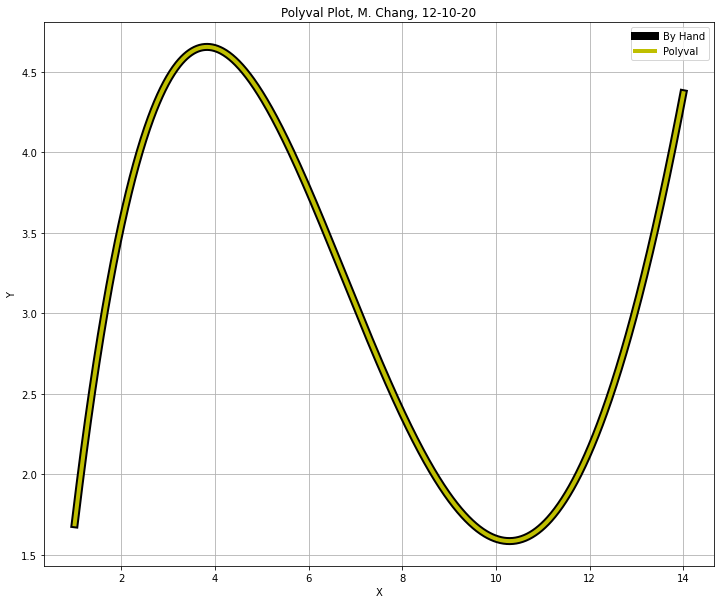

In [5]:
plt.figure(figsize=(12,10))
plt.plot(x, y_h, 'k-', linewidth=8.0, label = "By Hand") #plotting thick black line of the by hand equation
plt.plot(x, y_p, 'y-', linewidth=4.0, label = "Polyval") #plotting thinner yellow line of the polyval equation

#Labels
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polyval Plot, M. Chang, 12-10-20")

plt.grid()
plt.legend()

plt.savefig("Chang_Polyval.png", dpi=200)

### Problem 1.5

In [6]:
print(np.sum(y_h - y_p)) #the sum of the difference between the by hand equation and the polyval equation
print("This is what I expected because they are supposed to be the same points, and their differences are incredibly tiny.")

-2.7045032879868813e-13
This is what I expected because they are supposed to be the same points, and their differences are incredibly tiny.


## Problem 2 (Boiling Temperature of Water)

### Problem 2.1

In [7]:
h = np.array([0, 610, 1524, 2286, 3048, 6096, 7925]) #array of altitudes
TB = np.array([100, 98.89, 95, 92.22, 90, 81.11, 75.56]) #array of boiling temperatures of water

### Problem 2.2

In [8]:
n = 1
pfit = np.polyfit(h, TB, n) #coefficients for fit line
print(pfit)

#TB_fit = np.polyval(pfit, h) #creating a best fit line for temperature vs elevation
TB_fit = pfit[0]*h + pfit[1]

[-3.10580960e-03  9.99315347e+01]


### Problem 2.3

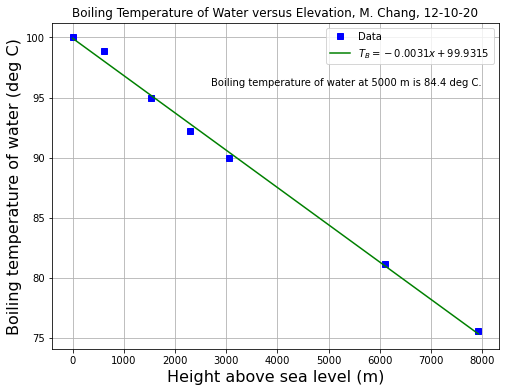

In [32]:
plt.figure(figsize=(8,6))
fs = 16

plt.plot(h, TB, 'bs', label = "Data") #blue square data points
plt.plot(h, TB_fit, 'g-', label = "$T_B = {0:0.4f}x + {1:0.4f}$".format(pfit[0], pfit[1])) #green best fit line

#labels
plt.xlabel("Height above sea level (m)", fontsize = fs)
plt.ylabel("Boiling temperature of water (deg C)", fontsize = fs)
plt.title("Boiling Temperature of Water versus Elevation, M. Chang, 12-10-20")

temp = 5000
TB_5000 = pfit[0]*temp + pfit[1] #calculating boiling temperature at 5000 m

#position for text
x_pos = 2700
y_pos = 96
plt.text(x_pos, y_pos, "Boiling temperature of water at 5000 m is {0:0.1f} deg C.".format(TB_5000)) #label on graph saying what temperature the water is at 5000 m

plt.legend()
plt.grid()

plt.savefig("Chang_TBversusAlt.png", dpi=200)

## Problem 3 (Bacterial Growth in a Petri Dish)

### Problem 3.1

In [10]:
t = [10, 20, 30, 40, 50] #list of time in minutes
N_B = [150, 215, 335, 480, 770] #list of number of bacteria in thousands

### Problem 3.2

In [11]:
##############################################
#
#  Radioactive Decay Math: 
#  (--Cleaner formatting here than in markdown...)
#
#    r = R_o exp(t/tau)
#
#    log(r) = log(exp(t/tau)) + log(R_o)
#    log(r) =    t/tau       + log(R_o)
# 
#    x_new = t; y_new = log(r); 
#    p = polyfit(x_new, y_new, 1)
#
#    tau = 1/p[0]; R_o = exp(p[1]); 
#
##############################################

y_new = np.log(N_B)
deg = 1

p = np.polyfit(t, y_new, deg)
tau = 1/p[0]
N_0 = np.exp(p[1])

new_t = np.linspace(0, 1.25 * np.max(t), 1001)
exp_fit = N_0 * np.exp(new_t/tau) #rewritting equation by hand with coefficients from polyfit

### Problem 3.3

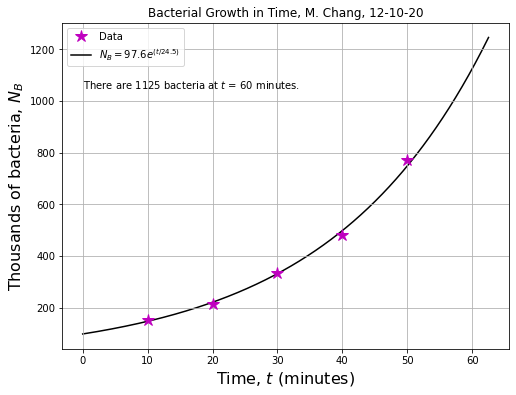

In [39]:
plt.figure(figsize = (8,6))
fs = 16 #font size

plt.plot(t, N_B, 'm*', markersize = 12, label = "Data") #Raw data that is magenta and stars
plt.plot(new_t, exp_fit, 'k-', label = "$N_B = {0:0.1f}e^{{(t/{1:0.1f})}}$".format(N_0, tau), zorder = -1) #black exponential fit line, behind the grid lines

#labels
plt.xlabel("Time, $t$ (minutes)", fontsize = fs)
plt.ylabel("Thousands of bacteria, $N_B$", fontsize = fs)
plt.title("Bacterial Growth in Time, M. Chang, 12-10-20")

plt.legend()
plt.grid()

time = 60
NB_60 = N_0 * np.exp(time/tau) #How many bacteria are there at time 60?

#position for text
x_pos = 0
y_pos = 1050
plt.text(x_pos, y_pos, "There are {0:0.0f} bacteria at $t$ = 60 minutes.".format(NB_60))

plt.savefig("Chang_Bacteria.png", dpi = 200)

## Problem 4 (Global Population Growth)

### Problem 4.1

In [13]:
y = np.array([1750, 1800, 1850, 1900, 1950, 1980, 1990, 2000, 2009, 2019]) #list of years
Pop = np.array([791, 980, 1260, 1650, 2520, 4454, 5270, 6060, 6800, 7744]) #list of population in millions
Pop = Pop / 1000 # 1000 million in 1 billion

### Problem 4.2

In [14]:
##########################################################################
# The math worked out for the following exponential fit line
# Pop = Ae^(my)
# ln Pop = ln Ae^(my) = ln(A) + ln(e^(my))
# ln Pop = ln(A) + my
# new_pop = ln Pop
# p = np.polyfit(y, new_pop, 1)
# p[0] = m , p[1] = ln(A)
# Pop = exp(p[1])e^(p[0] * y)
###########################################################################

mult = 1.04 #for how far past the max value of y the x-axis will span
deg = 1

new_pop = np.log(Pop)
pop_coeff = np.polyfit(y, new_pop, deg)
A = np.exp(pop_coeff[1])
m = pop_coeff[0]
new_y = np.linspace(np.min(y), mult * np.max(y), 1001)

pop_fit = A*np.exp(m*new_y) #rewriting equation by hand with coefficients from polyfit

### Problem 4.3

In [15]:
# Cubic fit line
deg = 3
pop_coeff2 = np.polyfit(y, Pop, deg)
new_y2 = np.linspace(np.min(y), mult*np.max(y), 1001)
cubic_pop = np.polyval(pop_coeff2, new_y2)

### Problem 4.4

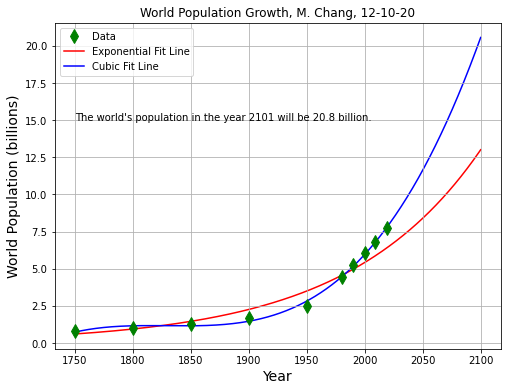

In [36]:
plt.figure(figsize = (8,6))
fs = 14 #font size

plt.plot(y, Pop, 'gd', label = "Data", markersize = 10) #Raw data in green diamonds
plt.plot(new_y, pop_fit, 'r-', label = "Exponential Fit Line", zorder = -1) #Red exponential fit line, behind grid lines
plt.plot(new_y2, cubic_pop, 'b-', label = "Cubic Fit Line", zorder = -1) #Blue cubic fit line, behind grid lines

centennial_year = 2101
centennial_pop = np.polyval(pop_coeff2, centennial_year) #What is the population in the year 2101 (which is when I am 100 years old)

#position for text
x_pos = np.min(y)
y_pos = 15
plt.text(x_pos, y_pos, "The world's population in the year {0} will be {1:0.1f} billion.".format(centennial_year, centennial_pop))

#labels
plt.xlabel("Year", fontsize = fs)
plt.ylabel("World Population (billions)", fontsize = fs)
plt.title("World Population Growth, M. Chang, 12-10-20")

plt.grid()
plt.legend()

plt.savefig("Chang_PopulationGrowth.png", dpi = 200)

## Problem 5 (Mid-Ocean Ridge Data)

### Problem 5.1

In [17]:
name, age, depth = np.loadtxt("MOR_data.txt", unpack = True, dtype = str) #reading in MOR_data into columns as str

### Problem 5.2

In [18]:
#converting age and depths to floats
age = np.asarray(age, dtype=np.float)
depth = np.asarray(depth, dtype=np.float)

### Problem 5.3

In [19]:
#data where t is less than 80 mya
less80_BA = (age < 80)
depth_less80 = depth[less80_BA]

##############################################
# fit line math
# depth = m(age)^(1/2) + depth_0
# y = depth, x = age^(1/2)
# p = np.polyfit(x, y, 1)
# p[0] = m, p[1] = depth_0
##############################################

t80 = age[less80_BA] ** (1/2)
new_age_fit = np.polyfit(t80, depth_less80, 1)
print(new_age_fit)

#The acutal fit line for all ages (not just up to 80)
new_time = np.linspace(0, age.max(), 1001)
t80_new = new_time ** (1/2) #substituting so np.polyval can work (form will be y = mx + b)
fit_line = np.polyval(new_age_fit, t80_new)

[ 330.92339191 2720.92879606]


### Problem 5.4

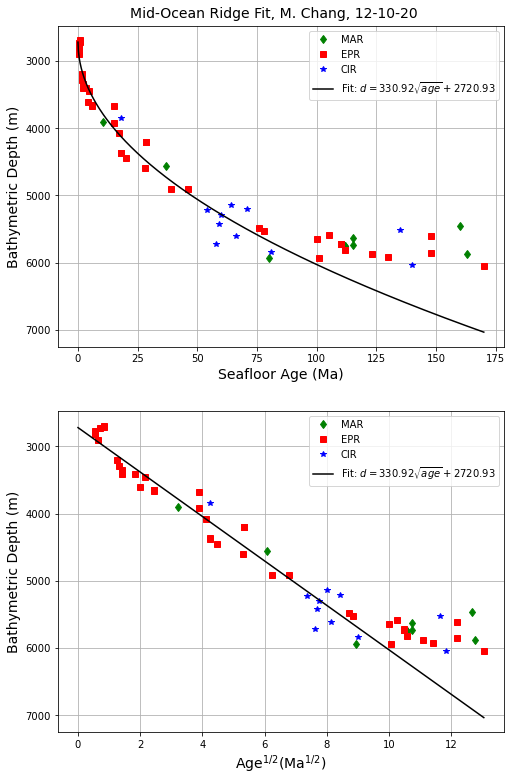

In [20]:
fig, ax = plt.subplots(2, 1, figsize = (8,13))
fs = 14 #font size

cir_BA = (name == "CIR")
epr_BA = (name == "EPR")
mar_BA = (name == "MAR")

BA = [mar_BA, epr_BA, cir_BA] #list of the names
color_mark = ['gd', 'rs', 'b*', 'k-'] #list of the colors along with the marker type
lbls = ["MAR", "EPR", "CIR", "Fit: $d = {0:0.2f}\sqrt{{age}} + {1:0.2f}$".format(new_age_fit[0], new_age_fit[1])] #list of labels

#plotting the plots
for n in [0,1]:
    if (n == 0):
        for i in [0, 1, 2]:
            ax[n].plot(age[BA[i]], depth[BA[i]], color_mark[i], label = lbls[i]) #raw data
        ax[n].plot(new_time, fit_line, color_mark[len(color_mark) - 1], label = lbls[len(lbls) - 1]) #fit line
        ax[n].set_xlabel("Seafloor Age (Ma)", fontsize = fs)
    else:
        for i in [0, 1, 2]:
            ax[n].plot(age[BA[i]] ** (1/2), depth[BA[i]], color_mark[i], label = lbls[i]) #raw data
        ax[n].plot(new_time ** (1/2), fit_line, color_mark[len(color_mark) - 1], label = lbls[len(lbls) - 1]) #fit line
        ax[n].set_xlabel("Age$^{{1/2}}$(Ma$^{{1/2}}$)", fontsize = fs)
    
    ax[n].invert_yaxis() #reversing y-axis
    ax[n].set_ylabel("Bathymetric Depth (m)", fontsize = fs)
    ax[n].legend()
    ax[n].grid()

plt.suptitle("Mid-Ocean Ridge Fit, M. Chang, 12-10-20", y = 0.9, fontsize = fs)
plt.savefig("Chang_MORFit.png", dpi = 200)

#The second plot is linear because our x is to the (1/2) power and so when we plug this into the y equation: y = mx**(1/2) + b. The equation becomes linear both x and y are to the same order
#The data departs from the fit line at around 80 million because our ocean floor is only so deep

## Problem 6 (Magnetoconvection in Liquid Gallium)

### Problem 6.1

In [21]:
#reading in data
import scipy.io as sio
MCData = sio.loadmat("MCdata.mat", squeeze_me = True)
Ch = MCData["Ch"]
Ra = MCData["Ra"]
Nu = MCData["Nu"]

### Problem 6.2

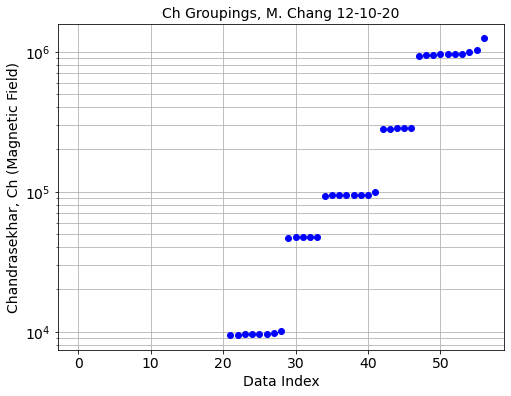

In [22]:
plt.figure(figsize = (8,6))
fs = 14

plt.semilogy(np.sort(Ch), 'bo') #plotting Ch vs index array

#labels
plt.xlabel("Data Index", fontsize = fs)
plt.ylabel("Chandrasekhar, Ch (Magnetic Field)", fontsize = fs)
plt.title("Ch Groupings, M. Chang 12-10-20", fontsize = fs)

plt.grid(which = "both")

#tick mark size
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)

plt.savefig("Chang_ChGroup.png", dpi = 200)

#On the graph, there are 5 Ch groups visible, including the zero group, there are 6 Ch groups

Ch_ranges = np.array([0, 2e4, 6e4, 1.5e5, 4e5, 2e6]) #array of the ranges that will be used to group Ch

### Problem 6.3

In [23]:
#grouping the data
for x in np.arange(0, 6, 1):
    if (x == 0): #If Ch = 0
        group_BA = (Ch == Ch_ranges[x])
        group = Ch[group_BA]
        print("Group {} mean: {}".format(x + 1, np.mean(group))) #taking mean of the group
    
    else: #If 0 < Ch < 2e4, 2e4 < Ch 6e4, ...
        group_BA = ((Ch > Ch_ranges[x - 1]) & (Ch < Ch_ranges[x])) #grouping the data that is within the intervals set by the boolean condition
        group = Ch[group_BA]
        print("Group {} mean: {}".format(x + 1, np.mean(group))) #taking mean of the group

Group 1 mean: 0.0
Group 2 mean: 9637.5
Group 3 mean: 47180.0
Group 4 mean: 95125.0
Group 5 mean: 282800.0
Group 6 mean: 990300.0


### Problem 6.4

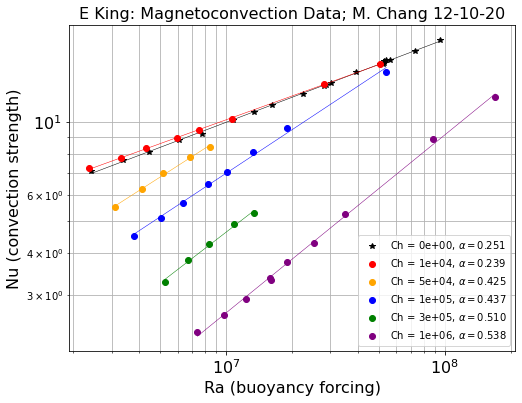

In [24]:
#####################################################################
# Fit line math
# Nu = cRa^(alpha)
# ln(Nu) = ln(cRa^(alpha))
# y = ln(Nu)
# ln(Nu) = ln(c) + ln(Ra^(alpha)) = ln(c) + alpha * ln(Ra)
# x = ln(Ra)
# p = np.polyfit(ln(Ra), ln(Nu), 1)
# p[0] = alpha, p[1] = ln(c)
# c = e^(p[1])
# Nu can be rewritten as, Nu = (e^(p[1])) * Ra^(p[0])
######################################################################

plt.figure(figsize=(8,6))

marker = ['*', 'o', 'o', 'o', 'o', 'o'] #marker symbols
clr = ["black", "red", "orange", "blue", "green", "purple"] #colors
lw = 0.5 #linewidth
deg = 1 #degree
fs = 16 #fontsize

for x in np.arange(0, 6, 1):
    if (x == 0):
        group_BA = (Ch == Ch_ranges[x])
        group = Ch[group_BA]
    else:
        group_BA = ((Ch > Ch_ranges[x - 1]) & (Ch < Ch_ranges[x]))
        group = Ch[group_BA]
        
    #creating fit line, see math above
    nu = np.polyfit(np.log(Ra[group_BA]), np.log(Nu[group_BA]), deg)
    c = np.exp(nu[1])
    alpha = nu[0]
    nu_line = c*(Ra[group_BA] ** alpha) #rewriting line by hand with coefficients from polyfit
        
    #plotting data with fit line
    plt.loglog(Ra[group_BA], Nu[group_BA], marker[x], color = clr[x], label = r"Ch = {0:0.0e}, $\alpha = {1:0.3f}$".format(np.mean(group), alpha))
    plt.loglog(Ra[group_BA], nu_line, color = clr[x], linewidth = lw)

plt.legend(loc = "lower right")
plt.grid(which = "both")

#labels
plt.xlabel("Ra (buoyancy forcing)", fontsize = fs)
plt.ylabel("Nu (convection strength)", fontsize = fs)
plt.title("E King: Magnetoconvection Data; M. Chang 12-10-20", fontsize = fs)
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)

plt.savefig("Chang_NuRaCh.png", dpi = 200)

### Problem 6.5

In [25]:
print("How did theory and data compare? Answer in a print statement.")
print("They matched up pretty well!")

How did theory and data compare? Answer in a print statement.
They matched up pretty well!


## Feedback

My only feedback really is just to proofread things. I notice some areas of the homework where there are contradictions (mainly what to label the graphs or name them).